In [1]:
# Data Analysis Packages
from sklearn import preprocessing
import pandas as pd
import numpy as np
import pickle as pk

In [2]:
# Graphing Packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Import and Save Data

### Crypto Search Data (from Google Trends)

In [5]:
# Import pytrends package
import pytrends as pt
from pytrends.request import TrendReq

# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)

# Set the keyword & timeframe
keywords = ["Bitcoin", "Ethereum"]
pt.build_payload(keywords, timeframe="all")

# Get the interest over time
crypto_search = pt.interest_over_time()

# Save search data as pickled pandas datafame and .csv file
pk.dump(crypto_search, open( "binary\\og_search_data.p", "wb" ) )
crypto_search.to_csv("csv\\og_search_data_relative.csv")

### Crypto Price Data (from Yahoo Finance)

In [7]:
# Import yfinance package
import yfinance as yf
crypto_price = yf.download("BTC-USD", start="2009-01-01", end="2021-01-19",interval = "1d")

# Save price data as pickled pandas datafame and .csv file
pk.dump(crypto_price, open( "binary\\og_price_data.p", "wb" ) )
crypto_price.to_csv("binary\\og_price_data.csv")

[*********************100%***********************]  1 of 1 completed


### Check that everything was imported and saved successfully

In [8]:
# Crypto search data
pk.load(open("binary\\og_search_data.p", "rb"))

,Bitcoin,Ethereum,isPartial
date,,,
2004-01-01,0,0,False
2004-02-01,0,0,False
2004-03-01,0,0,False
2004-04-01,0,0,False
2004-05-01,0,0,False
...,...,...,...
2022-01-01,38,9,False
2022-02-01,34,7,False
2022-03-01,29,6,False


In [9]:
# BTC-USD price data
pk.load(open("binary\\og_price_data.p", "rb"))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-01-14,37325.109375,39966.406250,36868.562500,39187.328125,39187.328125,63615990033
2021-01-15,39156.707031,39577.710938,34659.589844,36825.367188,36825.367188,67760757881
2021-01-16,36821.648438,37864.367188,35633.554688,36178.140625,36178.140625,57706187875


### Import the original datasets

In [11]:
# Bitcoin block data
og_block_data = pk.load(open("og_data_binary\\og_block_data.p", "rb"))
# Crypto search data
og_search_data = pk.load(open("og_data_binary\\og_search_data.p", "rb"))

### Match the date range for both datasets

In [12]:
# Truncate the data to match the date range of the bitcoin block dataset
new_search_data = og_search_data.truncate(
    before=list(og_search_data.index)[60],
    after=list(og_search_data.index)[204]
)
# Save the pickeled pandas dataframe
pk.dump(new_search_data, open("block_and_search\\new_search_data.p", "wb" ))

In [13]:
# Drop columns with non-numerical data and height (because it's useless)
block_data = og_block_data.drop(['host'],inplace=False,axis=1)

dic = {}

for i in list(block_data.index)[:]:
    lst = [ ]
    for k in [block_data[c][i] for c in block_data.columns]:
        if type(k) == str:
            key = k.split(" ")[0]
            var = key.split('/')  
            new_key = var[-2] + '/' + var[-1]
        else:
            lst.append(k)
            
    if key not in dic.keys():
        dic[new_key] = lst
        
# Convert the dictionary to a pandas dataframe and rename the columns
new_block_data = pd.DataFrame.from_dict(data=dic,orient='index',columns=list(block_data.columns)[:-1])

# Save the pickeled pandas dataframe
pk.dump(new_block_data, open("block_and_search\\new_block_data.p", "wb" ))

### Check that the data was cleaned and saved correctly

In [14]:
pk.load(open("block_and_search\\new_block_data.p", "rb" ))

,height,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips
1/2009,2543,1,216,216,864,0.000000,50.00,0.000000
2/2009,5923,1,216,216,864,0.000000,50.00,0.000000
3/2009,9389,1,216,216,864,0.000000,50.00,0.000000
4/2009,12831,1,216,216,864,0.000000,50.00,0.000000
5/2009,16214,1,216,216,864,0.000000,50.00,0.000000
...,...,...,...,...,...,...,...,...
9/2020,650731,2783,940687,1176404,3998465,0.000122,6.25,0.485954
10/2020,654932,2364,921982,1232764,3998710,0.000168,6.25,0.670329
11/2020,659398,2923,923692,1221624,3992700,0.000221,6.25,0.880890
12/2020,663912,2126,907164,1272042,3993534,0.000088,6.25,0.349810


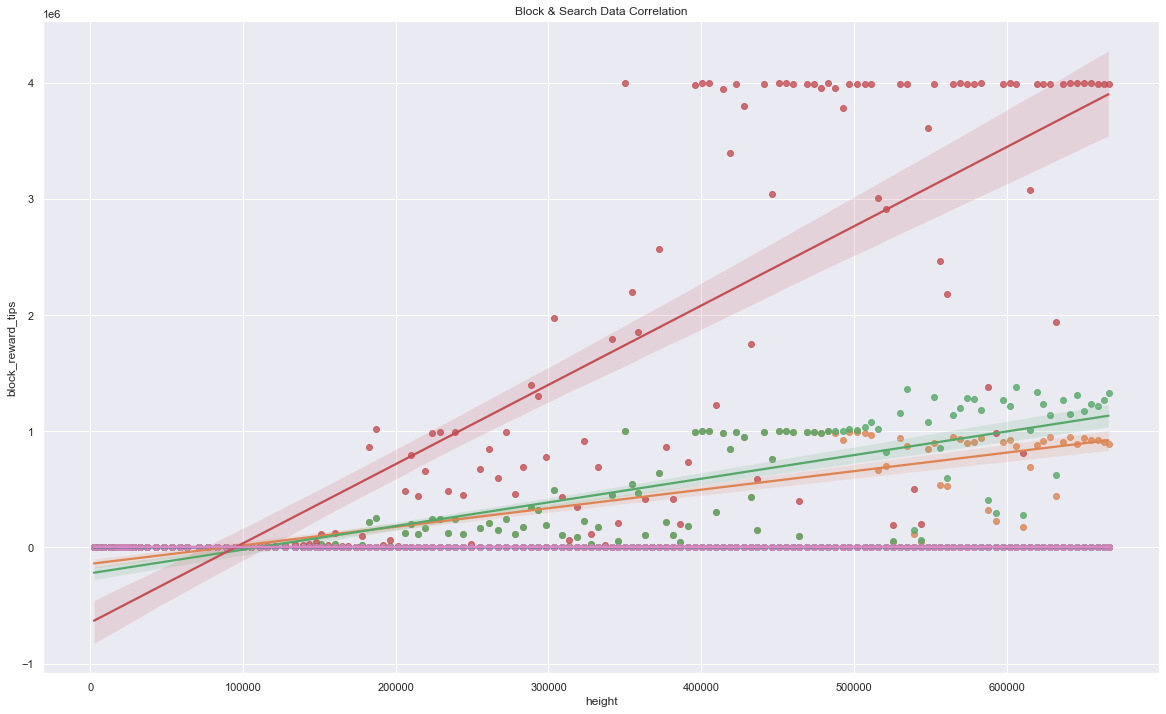

In [22]:
import seaborn as sns

plt.subplots(figsize= (20,12))

plt.title("Block & Search Data Correlation")
sns.set_theme(color_codes=True)

test = pk.load(open("block_and_search\\new_block_data.p", "rb" ))

for i in test.columns:
    if i != 'height':
        # plt.plot(test[i], label=i)
        sns.regplot(x='height', y=i, data=test)    

# plt.savefig("block_and_search\\block_and_search_corr.jpg", dpi = 300)

In [8]:
pk.load(open("block_and_search\\new_search_data.p", "rb" ))

,Bitcoin,Ethereum,isPartial
date,,,
2009-01-01,0,0,False
2009-02-01,0,0,False
2009-03-01,0,0,False
2009-04-01,0,0,False
2009-05-01,0,0,False
...,...,...,...
2020-09-01,13,2,False
2020-10-01,13,1,False
2020-11-01,23,3,False


### Concatenate Block and Search Data

In [23]:
# Load binary files
new_block_data = pk.load(open("block_and_search\\new_block_data.p", "rb" ))
new_search_data = pk.load(open("block_and_search\\new_search_data.p", "rb" ))

# Match the indexes
new_block_data = new_block_data.set_index(new_search_data.index)

# Concatenate the block and search datasets
block_and_search_concat = pd.concat([new_search_data,new_block_data], axis=1)
block_and_search_concat.drop(['isPartial'],inplace=True,axis=1)

# Save the concatenated dataset
block_and_search_concat.to_csv("block_and_search\\block_and_search_concat.csv")
pk.dump(block_and_search_concat, open("block_and_search\\block_and_search_concat.p", "wb" ))

# Show the dataset
block_and_search_concat

,Bitcoin,Ethereum,height,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips
date,,,,,,,,,,
2009-01-01,0,0,2543,1,216,216,864,0.000000,50.00,0.000000
2009-02-01,0,0,5923,1,216,216,864,0.000000,50.00,0.000000
2009-03-01,0,0,9389,1,216,216,864,0.000000,50.00,0.000000
2009-04-01,0,0,12831,1,216,216,864,0.000000,50.00,0.000000
2009-05-01,0,0,16214,1,216,216,864,0.000000,50.00,0.000000
...,...,...,...,...,...,...,...,...,...,...
2020-09-01,13,2,650731,2783,940687,1176404,3998465,0.000122,6.25,0.485954
2020-10-01,13,1,654932,2364,921982,1232764,3998710,0.000168,6.25,0.670329
2020-11-01,23,3,659398,2923,923692,1221624,3992700,0.000221,6.25,0.880890


In [ ]:
import seaborn as sns

# plt.subplots(figsize= (20,12))

# plt.title("Price & Block Data Correlation")
# sns.set_theme(color_codes=True)

# test = block_and_search_concat

for i in test.columns:
    if i != 'height' and i != 'block_reward_tips' and i != 'block_reward':
        # plt.plot(test[i], label=i)
        # sns.regplot(x='height', y=i, data=test)    
        plt.subplots(figsize= (20,12))
        sns.lmplot(x="height", y=i, data=test, x_jitter=.05)
        sns.set_theme(color_codes=True)
        plt.title("Price & Block Data Correlation")
        plt.savefig(f"block_and_search\\{i}_reg.jpg", dpi = 300)

In [ ]:
plt.subplots(figsize= (20,12))
plt.title("Price & Block Data Correlation")
sns.regplot(x='height', y='size', data=test)    
# sns.lmplot(x="height", y=i, data=test, x_jitter=.05)
sns.set_theme(color_codes=True)
plt.savefig(f"block_and_search\\size_reg.jpg", dpi = 300)

plt.subplots(figsize= (20,12))
plt.title("Price & Block Data Correlation")
sns.regplot(x='height', y='volume', data=test)    
# sns.lmplot(x="height", y=i, data=test, x_jitter=.05)
sns.set_theme(color_codes=True)
plt.savefig(f"block_and_search\\volume_reg.jpg", dpi = 300)

plt.subplots(figsize= (20,12))
plt.title("Price & Block Data Correlation")
sns.regplot(x='height', y='weight', data=test)    
# sns.lmplot(x="height", y=i, data=test, x_jitter=.05)
sns.set_theme(color_codes=True)
plt.savefig(f"block_and_search\\weight_reg.jpg", dpi = 300)

### Calculate the correlation between the data points

In [ ]:
# Load binary files
block_and_search_concat = pk.load(open("block_and_search\\block_and_search_concat.p", "rb" ))

# Show Correlation
block_and_search_corr = block_and_search_concat.corr(method='pearson')

# Saved the dataset
pk.dump(block_and_search_corr, open("block_and_search\\block_and_search_corr.p", "wb" ))

# Show the dataset
block_and_search_corr

### Visualize the correlation as a heat map

In [ ]:
plt.subplots(figsize= (20,12))
sns.heatmap(block_and_search_corr, annot= True, fmt= '.2%')
plt.title("Block & Search Data Correlation")
plt.savefig("block_and_search\\block_and_search_corr.jpg", dpi = 300)

### Min-Max Scale the data so we can better visualize the change over time

In [ ]:
# Load binary files
block_and_search_concat = pk.load(open("block_and_search\\block_and_search_concat.p", "rb" ))

# Scale the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(block_and_search_concat)
block_and_search_scaled = pd.DataFrame(scaled, columns = block_and_search_concat.columns)
block_and_search_scaled = block_and_search_scaled.set_index(block_and_search_concat.index)

pk.dump(block_and_search_scaled, open("block_and_search\\block_and_search_scaled.p", "wb" ))
block_and_search_scaled

### Visualize Block and search Data (Unscaled) 

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(block_and_search_concat['Bitcoin'].truncate(before=list(block_and_search_concat.index)[14]), label="BTC")
line2, = ax.plot(block_and_search_concat['Ethereum'].truncate(before=list(block_and_search_concat.index)[14]), label="ETH")
# line3, = ax.plot(block_and_search_concat['size'].truncate(before=list(block_and_search_concat.index)[14]), label="Size")
# line4, = ax.plot(block_and_search_concat['stripped_size'].truncate(before=list(block_and_search_concat.index)[14]), label="Stripped Size")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("y-axis")

# Add a title to the plot
plt.title("Block & Search Data Over Time")

# Resize the plot
plt.rcParams["figure.figsize"] = (20,12)

# Save the plot
# plt.savefig("plots\\crypto_iot.jpg", dpi = 300)

# Show the plot
plt.show()

### Visualize Block and Search Data (Scaled)

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(block_and_search_scaled['Bitcoin'].truncate(before=list(block_and_search_scaled.index)[14]), label="BTC")
# line2, = ax.plot(block_and_search_scaled['Ethereum'].truncate(before=list(block_and_search_scaled.index)[14]), label="ETH")
line3, = ax.plot(block_and_search_scaled['size'].truncate(before=list(block_and_search_scaled.index)[14]), label="Size")
# line4, = ax.plot(block_and_search_scaled['stripped_size'].truncate(before=list(block_and_search_scaled.index)[14]), label="Stripped Size")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line3], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Relative Interest")

# Add a title to the plot
plt.title("Block & Search Data Over Time")

# Resize the plot
plt.rcParams["figure.figsize"] = (20,12)

# Save the plot
# plt.savefig("plots\\crypto_iot.jpg", dpi = 300)

# Show the plot
plt.show()

### Import the original dataset

In [41]:
# Bitcoin block data
og_block_data = pk.load(open("og_data_binary\\og_block_data.p", "rb"))
# Crypto search data
og_price_data = pk.load(open("og_data_binary\\og_price_data.p", "rb"))

### Match the date range for both datasets

In [ ]:
# Match the indexes
dic = {}
for i in list(og_block_data.index):
    lst = [ ]
    for k in [og_block_data[c][i] for c in og_block_data.columns]:
        if type(k) == str:
            key = k.split(" ")[0]
        else:
            lst.append(k)
            
    if key not in dic.keys():
        dic[key] = lst
        
# Convert back to dataframe and rename columns
block_data_new = pd.DataFrame.from_dict(data=dic, orient='index', columns=['Height', 'Trans Volume', 'Stripped Size', 'Size', 'Weight', 'Avg. Transaction Fee', 'Block Reward', 'Block Reward Tips' ])

# Truncate the data and match indexes
block_data_new = block_data_new.reset_index()
block_data_new = block_data_new.truncate(before=2078)
block_data_new = block_data_new.set_index(og_price_data.index)

# Save the dataframe
pk.dump(block_data_new,open("price_and_block\\block_data_new.p", "wb"))
# block_data_new

### Check that the data was cleaned and saved correctly

In [ ]:
pk.load(open("price_and_block\\block_data_new.p", "rb"))

In [ ]:
pk.load(open("og_data_binary\\og_price_data.p", "rb"))

### Concatenate Price and Block Data

In [ ]:
# Load in pickled data
block_data_new =  pk.load(open("price_and_block\\block_data_new.p", "rb"))

# Concatenate the data
price_and_block_concat = pd.concat([block_data_new,og_price_data],axis=1)
price_and_block_concat = price_and_block_concat.drop(['index','Height'],axis=1)

# Save the dataframe
pk.dump(price_and_block_concat,open("price_and_block\\price_and_block_concat.p", "wb"))

# Show the dataframe
price_and_block_concat

### Calculate the correlation between the data points

In [ ]:
# Load binary files
price_and_block_concat  = pk.load(open("price_and_block\\price_and_block_concat.p", "rb"))

# Show Correlation
price_and_block_corr = price_and_block_concat.corr(method='pearson')

# Saved the dataset
pk.dump(price_and_block_corr, open("price_and_block\\price_and_block_corr.p", "wb" ))

# Show the dataset
price_and_block_corr

### Visualize the correlation as a heat map

In [ ]:
plt.subplots(figsize= (30,12))
sns.heatmap(price_and_block_corr, annot= True, fmt= '.2%')
plt.title("Bitcoin Block & Price Data")
plt.savefig("price_and_block\\price_and_block_corr.jpg", dpi = 300)

### Min-Max Scale the data so we can better visualize the change over time

In [ ]:
# Load binary files
price_and_block_concat = pk.load(open("price_and_block\\price_and_block_concat.p", "rb"))

#Scale the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(price_and_block_concat)
price_and_block_scaled = pd.DataFrame(scaled, columns = price_and_block_concat.columns)
price_and_block_scaled = price_and_block_scaled.set_index(price_and_block_concat.index)

# Save the dataframe
pk.dump(price_and_block_scaled, open("price_and_block\\price_and_block_scaled.p", "wb" ))
price_and_block_scaled

### Visualize Price and Block data (Unscaled)

In [ ]:
# Create subplots
fig, ax = plt.subplots()
# line1, = ax.plot(price_and_block_concat['Size'], label="Block Size")
line2, = ax.plot(price_and_block_concat['Volume'], label="Transaction Volume")
# line3, = ax.plot(df_scale['High'], label="Price")
# line4, = ax.plot(df_scale['High'], label="Price")
# line5, = ax.plot(df_scale['High'], label="Price")

# Create a legend for the plot
first_legend = ax.legend(handles=[line2], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Time")
plt.ylabel("y-axis")

# Add a title to the plot
plt.title("Price & Block Data Over Time")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)

# Save the plot to present directory
plt.savefig("plots\\crypto_iot.jpg", dpi = 300)

# Show the plot
plt.show()

### Visualize Price and Block data (Scaled)

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(price_and_block_scaled['Size'], label="Bitcoin Transaction Fees")
line2, = ax.plot(price_and_block_scaled['Volume'], label="Trading Volume")
line3, = ax.plot(price_and_block_scaled['Open'], label="Trading Volume")
# line3, = ax.plot(df_scale['High'], label="Price")
# line4, = ax.plot(df_scale['High'], label="Price")
# line5, = ax.plot(df_scale['High'], label="Price")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2,line3], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Time")
plt.ylabel("Price and Interest (Scaled from 1-100)")

# Add a title to the plot
plt.title("Crypto Price and Block Data")

# Adjust the plot's size
plt.rcParams["figure.figsize"] = (20,12)

# Save the plot to present directory
plt.savefig("price_and_block\\price_and_block_scaled.jpg", dpi = 300)

# Show the plot
plt.show()

# Search & Price Data

### Import the original datasets

In [11]:
# Crypto Search Data
og_search_data = pk.load(open("binary\\og_search_data.p", "rb"))

In [66]:
# Set the keyword & timeframe
keywords = ["Bitcoin", "Dogecoin", "Ethereum", "Binance Coin", "Litecoin"]
pt.build_payload(keywords, timeframe="all")

# Get the interest over time
crypto_search_data = pt.interest_over_time()

# Save search data as pickled pandas datafame and .csv file
pk.dump(crypto_search, open( "binary\\crypto_search_data.p", "wb" ) )

In [15]:
# Import yfinance package
import yfinance as yf
crypto_price = yf.download("BTC-USD ETH-USD DOGE-USD BNB-USD LTC-USD", start="2009-01-01", end="2022-05-01",interval = "1d")

# Save price data as pickled pandas datafame and .csv file
pk.dump(crypto_price, open( "binary\\crypto_price_data.p", "wb" ) )
crypto_price

[*********************100%***********************]  5 of 5 completed


Adj Close                                                   \
               BNB-USD       BTC-USD  DOGE-USD      ETH-USD     LTC-USD   
Date                                                                      
2014-09-17         NaN    457.334015       NaN          NaN    5.058550   
2014-09-18         NaN    424.440002       NaN          NaN    4.685230   
2014-09-19         NaN    394.795990       NaN          NaN    4.327770   
2014-09-20         NaN    408.903992       NaN          NaN    4.286440   
2014-09-21         NaN    398.821014       NaN          NaN    4.245920   
...                ...           ...       ...          ...         ...   
2022-04-26  385.483063  38117.460938  0.137767  2808.298340   98.404678   
2022-04-27  391.445831  39241.121094  0.139700  2888.929688  100.538757   
2022-04-28  406.718201  39773.828125  0.137363  2936.940918  103.323349   
2022-04-29  393.062164  38609.824219  0.135027  2815.601807  100.378006   
2022-04-30  377.767822  37714.875000  0.127557  2730.186768   96.165985   

                 Close                                                   ...  \
               BNB-USD       BTC-USD  DOGE-USD      ETH-USD     LTC-USD  ...   
Date                                                                     ...   
2014-09-17         NaN    457.334015       NaN          NaN    5.058550  ...   
2014-09-18         NaN    424.440002       NaN          NaN    4.685230  ...   
2014-09-19         NaN    394.795990       NaN          NaN    4.327770  ...   
2014-09-20         NaN    408.903992       NaN          NaN    4.286440  ...   
2014-09-21         NaN    398.821014       NaN          NaN    4.245920  ...   
...                ...           ...       ...          ...         ...  ...   
2022-04-26  385.483063  38117.460938  0.137767  2808.298340   98.404678  ...   
2022-04-27  391.445831  39241.121094  0.139700  2888.929688  100.538757  ...   
2022-04-28  406.718201  39773.828125  0.137363  2936.940918  103.323349  ...   
2022-04-29  393.062164  38609.824219  0.135027  2815.601807  100.378006  ...   
2022-04-30  377.767822  37714.875000  0.127557  2730.186768   96.165985  ...   

                  Open                                                   \
               BNB-USD       BTC-USD  DOGE-USD      ETH-USD     LTC-USD   
Date                                                                      
2014-09-17         NaN    465.864014       NaN          NaN    5.085890   
2014-09-18         NaN    456.859985       NaN          NaN    5.065430   
2014-09-19         NaN    424.102997       NaN          NaN    4.687290   
2014-09-20         NaN    394.673004       NaN          NaN    4.329200   
2014-09-21         NaN    408.084991       NaN          NaN    4.263070   
...                ...           ...       ...          ...         ...   
2022-04-26  404.268860  40448.421875  0.157777  3008.946289  104.671066   
2022-04-27  385.562164  38120.300781  0.137847  2808.645996   98.413170   
2022-04-28  391.438660  39241.429688  0.139691  2888.849854  100.542412   
2022-04-29  406.641724  39768.617188  0.137376  2936.776611  103.318619   
2022-04-30  392.998535  38605.859375  0.135033  2815.533447  100.378754   

                  Volume                                                      
                 BNB-USD      BTC-USD      DOGE-USD       ETH-USD    LTC-USD  
Date                                                                          
2014-09-17           NaN     21056800           NaN           NaN    3071840  
2014-09-18           NaN     34483200           NaN           NaN    4569260  
2014-09-19           NaN     37919700           NaN           NaN    3917450  
2014-09-20           NaN     36863600           NaN           NaN    5490660  
2014-09-21           NaN     26580100           NaN           NaN    2931220  
...                  ...          ...           ...           ...        ...  
2022-04-26  1.671964e+09  34569088416  4.529011e+09  1.905205e+10  702800418  


In [58]:
crypto_price.to_csv('csv\\crypto_price_a.csv')

### Match the date range for both datasets

In [67]:
# Match the indexes
for i in crypto_search_data.index:
    if int(str(i)[2:4]) < 14:
        crypto_search_data.drop(i, inplace=True)
    if str(i)[2:4] == '14' and int(str(i)[5:7]) < 10:
        crypto_search_data.drop(i, inplace=True)

# Drop the column
new_search_data = crypto_search_data.drop('isPartial',inplace=False,axis=1)

# Save the dataframe
pk.dump(new_search_data, open("binary\\new_search_data.p", "wb"))

In [18]:
# Load Binary file
crypto_price_data = pk.load(open("binary\\crypto_price_data.p", "rb"))

# Match the indexes
for i in crypto_price_data.index:
    if str(i)[8:10] != '01':
        crypto_price_data.drop(i, inplace=True)

# Save the dataframe
pk.dump(crypto_price_data, open("binary\\crypto_price_data.p", "wb"))

### Check that the data was cleaned and saved correctly

In [20]:
pk.load(open("binary\\crypto_price_data.p", "rb"))

Adj Close                                                   \
               BNB-USD       BTC-USD  DOGE-USD      ETH-USD     LTC-USD   
Date                                                                      
2014-10-01         NaN    383.614990       NaN          NaN    4.428560   
2014-11-01         NaN    325.748993       NaN          NaN    3.570590   
2014-12-01         NaN    379.244995       NaN          NaN    3.577140   
2015-01-01         NaN    314.248993       NaN          NaN    2.699050   
2015-02-01         NaN    226.972000       NaN          NaN    1.803520   
...                ...           ...       ...          ...         ...   
2021-12-01  627.971558  57229.828125  0.209487  4586.990234  208.971252   
2022-01-01  527.352722  47686.812500  0.173035  3769.697021  150.697433   
2022-02-01  385.463806  38743.273438  0.142631  2792.117188  115.402000   
2022-03-01  408.482300  44354.636719  0.133938  2972.485107  112.544044   
2022-04-01  446.604279  46281.644531  0.141315  3449.552246  124.883179   

                 Close                                                   ...  \
               BNB-USD       BTC-USD  DOGE-USD      ETH-USD     LTC-USD  ...   
Date                                                                     ...   
2014-10-01         NaN    383.614990       NaN          NaN    4.428560  ...   
2014-11-01         NaN    325.748993       NaN          NaN    3.570590  ...   
2014-12-01         NaN    379.244995       NaN          NaN    3.577140  ...   
2015-01-01         NaN    314.248993       NaN          NaN    2.699050  ...   
2015-02-01         NaN    226.972000       NaN          NaN    1.803520  ...   
...                ...           ...       ...          ...         ...  ...   
2021-12-01  627.971558  57229.828125  0.209487  4586.990234  208.971252  ...   
2022-01-01  527.352722  47686.812500  0.173035  3769.697021  150.697433  ...   
2022-02-01  385.463806  38743.273438  0.142631  2792.117188  115.402000  ...   
2022-03-01  408.482300  44354.636719  0.133938  2972.485107  112.544044  ...   
2022-04-01  446.604279  46281.644531  0.141315  3449.552246  124.883179  ...   

                  Open                                                   \
               BNB-USD       BTC-USD  DOGE-USD      ETH-USD     LTC-USD   
Date                                                                      
2014-10-01         NaN    387.427002       NaN          NaN    4.470960   
2014-11-01         NaN    338.649994       NaN          NaN    3.756660   
2014-12-01         NaN    378.248993       NaN          NaN    3.575590   
2015-01-01         NaN    320.434998       NaN          NaN    2.724210   
2015-02-01         NaN    216.867004       NaN          NaN    1.878780   
...                ...           ...       ...          ...         ...   
2021-12-01  621.812866  56907.964844  0.214487  4623.679688  207.636612   
2022-01-01  511.910370  46311.746094  0.170510  3683.047119  146.536865   
2022-02-01  375.099182  38481.765625  0.141805  2687.898926  109.589439   
2022-03-01  395.624115  43194.503906  0.133174  2919.775879  113.476082   
2022-04-01  429.124023  45554.164062  0.137922  3282.576172  123.731697   

                  Volume                                                      
                 BNB-USD      BTC-USD     DOGE-USD       ETH-USD     LTC-USD  
Date                                                                          
2014-10-01           NaN     26229400          NaN           NaN     1172180  
2014-11-01           NaN     16677200          NaN           NaN     2476220  
2014-12-01           NaN     11763000          NaN           NaN     1275120  
2015-01-01           NaN      8036550          NaN           NaN      770693  
2015-02-01           NaN     29128500          NaN           NaN     2661610  
...                  ...          ...          ...           ...         ...  
2021-12-01  2.806564e+09  36858195307  988030934.0  2.763483e+10  1739548260  


In [76]:
pk.load(open("binary\\new_search_data.p", "rb"))

,Bitcoin,Dogecoin,Ethereum,Binance Coin,Litecoin
date,,,,,
2014-10-01,3,0,0,0,0
2014-11-01,3,0,0,0,0
2014-12-01,3,0,0,0,0
2015-01-01,3,0,0,0,0
2015-02-01,3,0,0,0,0
...,...,...,...,...,...
2022-01-01,38,3,9,0,1
2022-02-01,33,2,7,0,0
2022-03-01,29,2,6,0,0


### Concatenate Search and Price Data

In [74]:
search_data

,Bitcoin,Dogecoin,Ethereum,Binance Coin,Litecoin
date,,,,,
2014-10-01,3,0,0,0,0
2014-11-01,3,0,0,0,0
2014-12-01,3,0,0,0,0
2015-01-01,3,0,0,0,0
2015-02-01,3,0,0,0,0
...,...,...,...,...,...
2021-12-01,35,3,9,1,1
2022-01-01,38,3,9,0,1
2022-02-01,33,2,7,0,0


In [77]:
price_data = pk.load(open("binary\\crypto_price_data.p", "rb"))
search_data = pk.load(open("binary\\new_search_data.p", "rb"))
search_data.drop(search_data.index[-1], inplace=True)
search_data

# Iterate over the price_data columns and drop the columns that do not have the string "Close" in them
for i in price_data.columns:
    if "Open" not in i:
        price_data.drop(i, inplace=True, axis=1)

# Concatendate the two dataframes
search_and_price_concat = pd.concat([search_data,price_data],axis=1)

# Add a column to the dataframe that contains the length of the dataframe
search_and_price_concat['Time'] = [i for i in range(len(search_and_price_concat.index))]

search_and_price_concat.columns = ['Bitcoin Searches', 'Dogecoin Searches', 'Ethereum Searches', 'Binance Coin Searches', 'Litecoin Searches', 'BNB-USD', 'BTC-USD', 'DOGE-USD','ETH-USD','LTC-USD','Time']
search_and_price_concat.drop(['Binance Coin Searches','BNB-USD'], 
                             inplace=True,
                             axis='columns')
            

# Save the dataframe
pk.dump(search_and_price_concat, open("binary\\search_and_price_concat.p", "wb"))
search_and_price_concat

,Bitcoin Searches,Dogecoin Searches,Ethereum Searches,Litecoin Searches,BTC-USD,DOGE-USD,ETH-USD,LTC-USD,Time
2014-10-01,3,0,0,0,387.427002,NaN,NaN,4.470960,0
2014-11-01,3,0,0,0,338.649994,NaN,NaN,3.756660,1
2014-12-01,3,0,0,0,378.248993,NaN,NaN,3.575590,2
2015-01-01,3,0,0,0,320.434998,NaN,NaN,2.724210,3
2015-02-01,3,0,0,0,216.867004,NaN,NaN,1.878780,4
...,...,...,...,...,...,...,...,...,...
2021-12-01,35,3,9,1,56907.964844,0.214487,4623.679688,207.636612,86
2022-01-01,38,3,9,1,46311.746094,0.170510,3683.047119,146.536865,87
2022-02-01,33,2,7,0,38481.765625,0.141805,2687.898926,109.589439,88
2022-03-01,29,2,6,0,43194.503906,0.133174,2919.775879,113.476082,89


### Calculate the correlation between the data points

In [78]:
# Calculate the correlation
search_and_price_corr = search_and_price_concat.corr(method='pearson')

# Save the dataframe
pk.dump(search_and_price_corr, open("binary\\search_and_price_corr.p", "wb"))

#### Visualize the correlation as a heat map

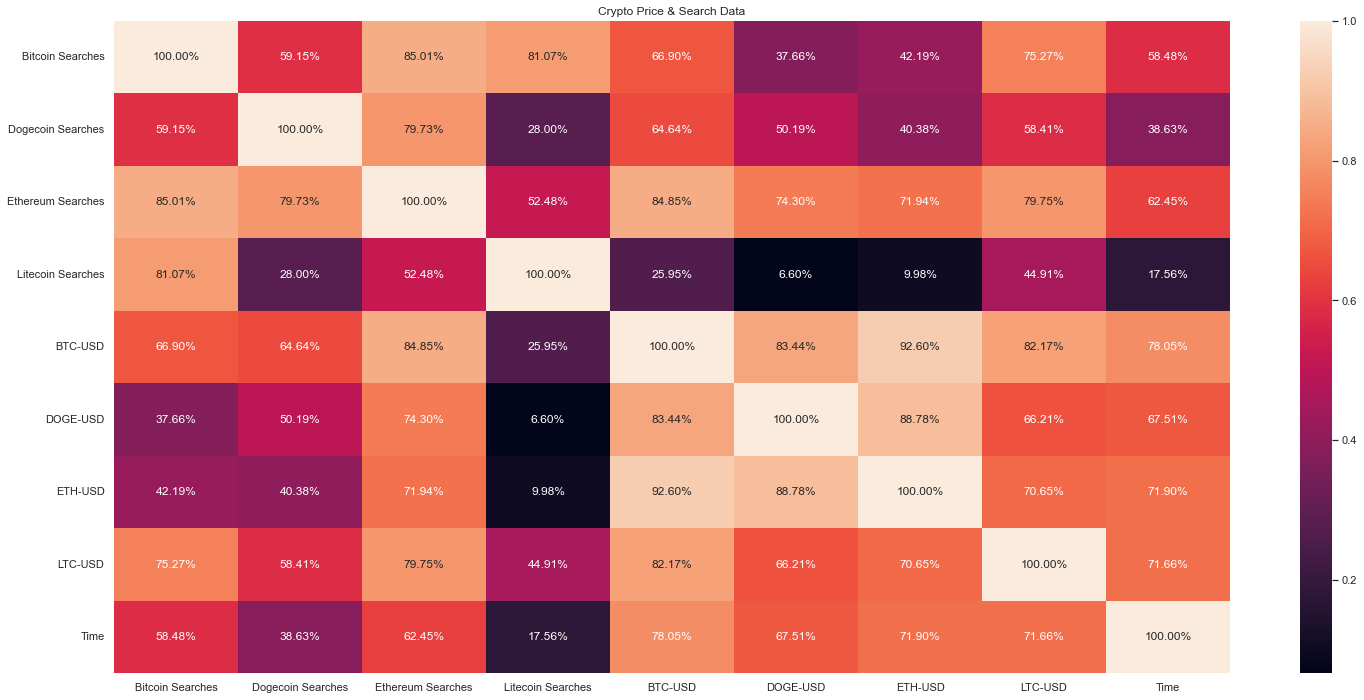

In [79]:
plt.subplots(figsize= (25,12))
sns.heatmap(search_and_price_corr, annot= True, fmt= '.2%')
plt.title("Crypto Price & Search Data")
plt.savefig("plots\\search_and_price_corr.jpg", dpi = 300)

### Min-Max Scale the data so we can better visualize the change over time

In [56]:
#Scale the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(search_and_price_concat)
search_and_price_scale = pd.DataFrame(scaled, columns = search_and_price_concat.columns)
search_and_price_scale = search_and_price_scale.set_index(search_and_price_concat.index)

# Save the dataframe
search_and_price_scale.to_csv("csv\\search_and_price_scale.csv")
search_and_price_scale.to_pickle("binary\\search_and_price_scale.p")

# Show the plot
search_and_price_scale['dates'] = search_and_price_scale.index
search_and_price_scale

,Bitcoin Searches,Ethereum Searches,Dogecoin Searches,Litecoin Searches,BTC-USD,DOGE-USD,ETH-USD,LTC-USD,Time,dates
2014-10-01,1.020408,0.000000,0.000000,0.0,0.279133,NaN,NaN,1.122771,0.000000,2014-10-01
2014-11-01,1.020408,0.000000,0.000000,0.0,0.199306,NaN,NaN,0.857920,1.111111,2014-11-01
2014-12-01,1.020408,0.000000,0.000000,0.0,0.264112,NaN,NaN,0.790783,2.222222,2014-12-01
2015-01-01,1.020408,0.000000,0.000000,0.0,0.169496,NaN,NaN,0.475106,3.333333,2015-01-01
2015-02-01,1.020408,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.161635,4.444444,2015-02-01
...,...,...,...,...,...,...,...,...,...,...
2021-12-01,33.673469,40.909091,9.090909,10.0,92.778681,63.343825,100.000000,76.453059,95.555556,2021-12-01
2022-01-01,36.734694,40.909091,9.090909,10.0,75.437278,50.245568,79.173566,53.798336,96.666667,2022-01-01
2022-02-01,32.653061,31.818182,6.060606,0.0,62.623004,41.695976,57.140108,40.098873,97.777778,2022-02-01
2022-03-01,27.551020,27.272727,6.060606,0.0,70.335708,39.125293,62.274068,41.539973,98.888889,2022-03-01


### Visualize Price and Search data (Unscaled)

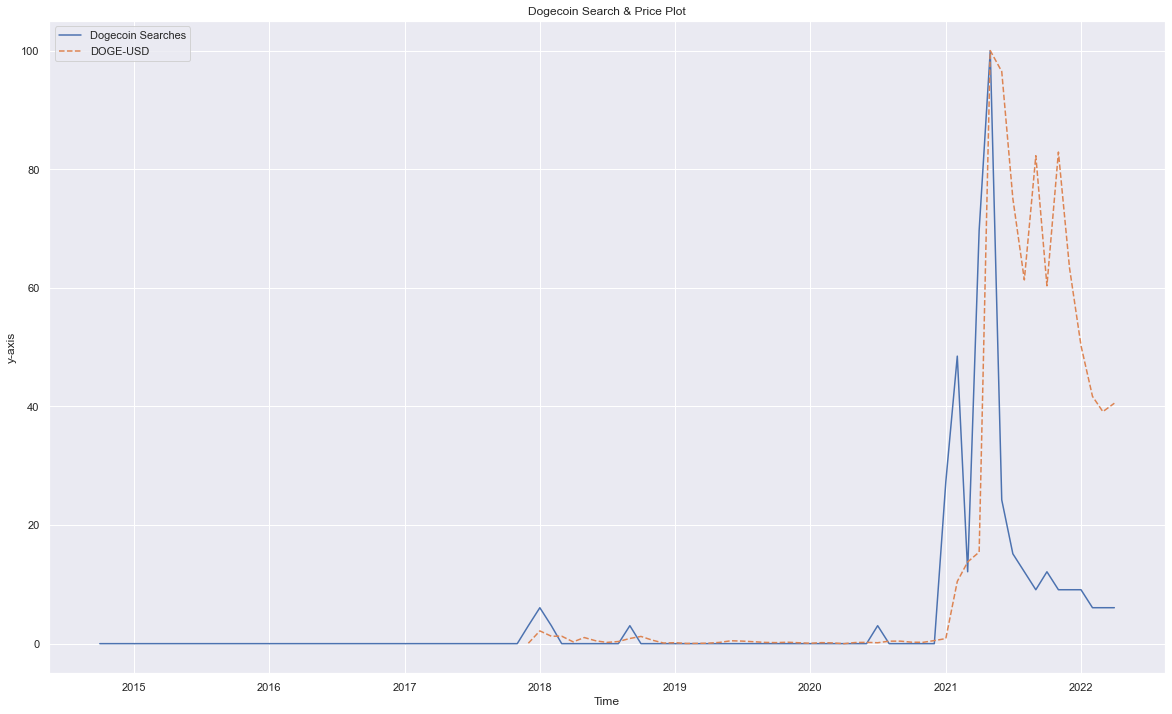

In [64]:
plt.subplots(figsize= (20,12))

sns.set_theme(color_codes=True)

sns.lineplot(x='dates',
            y='Dogecoin Searches',
            data=search_and_price_scale,
            label='Dogecoin Searches')

sns.lineplot(x='dates', 
            y='DOGE-USD', 
            data=search_and_price_scale,
            label='DOGE-USD',
            linestyle="dashed")

plt.title("Dogecoin Search & Price Plot")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')

# Save plot
plt.savefig("plots\\search_and_price_plot_doge.jpg", dpi = 300)
plt.show()

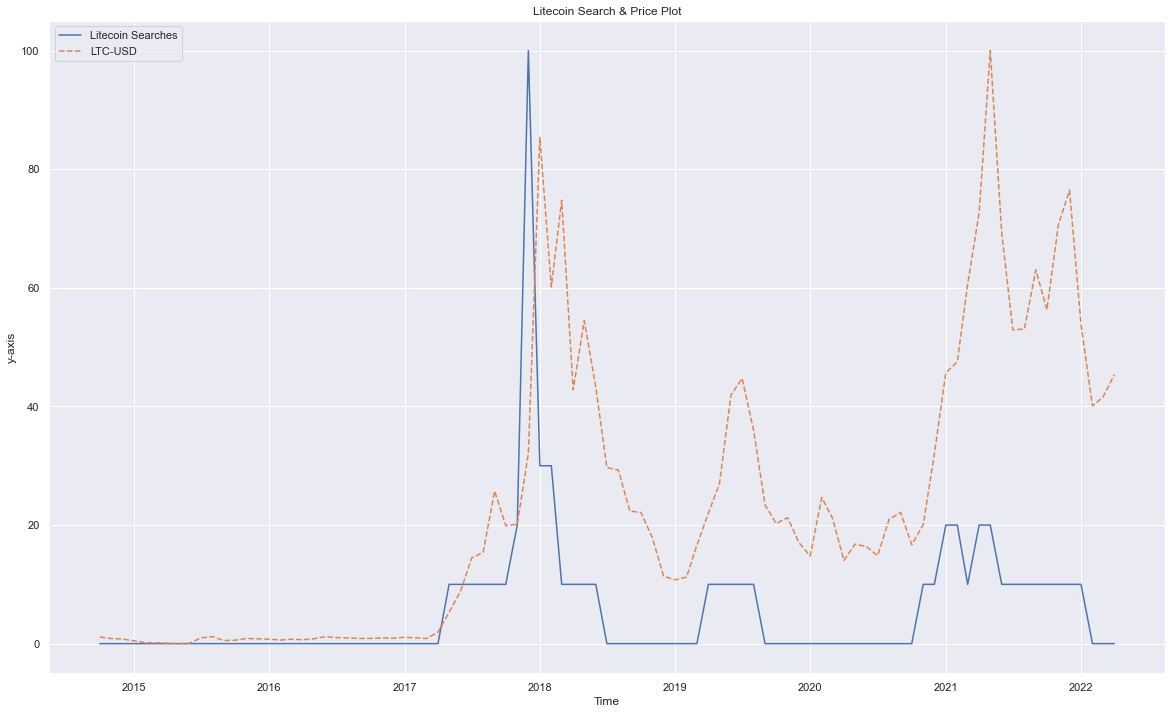

In [65]:
plt.subplots(figsize= (20,12))

sns.set_theme(color_codes=True)

sns.lineplot(x='dates',
            y='Litecoin Searches',
            data=search_and_price_scale,
            label='Litecoin Searches')

sns.lineplot(x='dates', 
            y='LTC-USD', 
            data=search_and_price_scale,
            label='LTC-USD',
            linestyle="dashed")

plt.title("Litecoin Search & Price Plot")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')

# Save plot
plt.savefig("plots\\search_and_price_plot_ltc.jpg", dpi = 300)
plt.show()

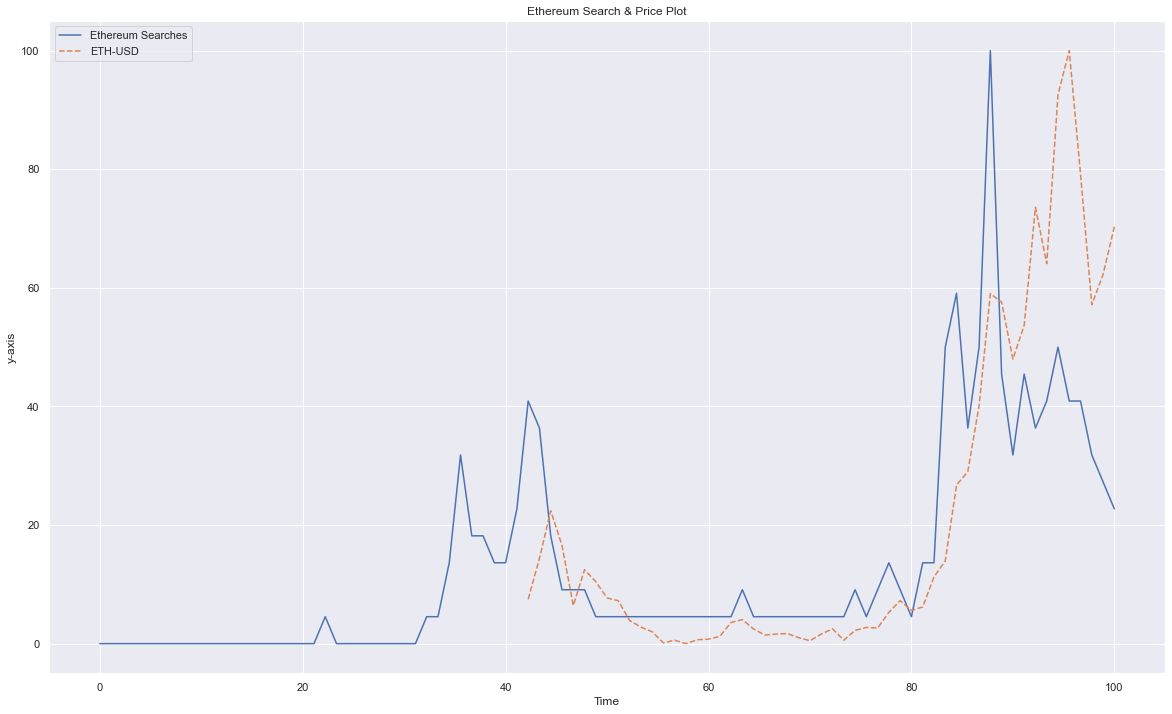

In [63]:
plt.subplots(figsize= (20,12))

sns.set_theme(color_codes=True)

sns.lineplot(x='Time',
            y='Ethereum Searches',
            data=search_and_price_scale,
            label='Ethereum Searches')

sns.lineplot(x='Time', 
            y='ETH-USD', 
            data=search_and_price_scale,
            label='ETH-USD',
            linestyle="dashed")

plt.title("Ethereum Search & Price Plot")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')

# Save plot
plt.savefig("plots\\search_and_price_plot_eth.jpg", dpi = 300)
plt.show()

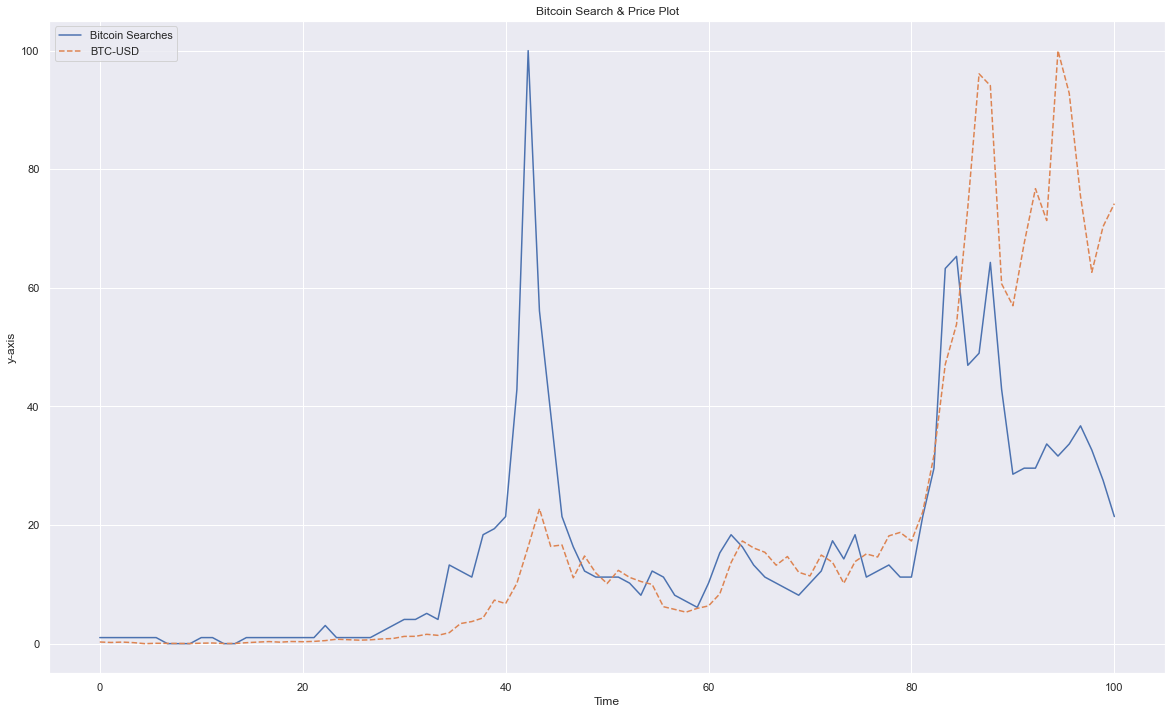

In [54]:
plt.subplots(figsize= (20,12))

sns.set_theme(color_codes=True)

sns.lineplot(x='Time',
            y='Bitcoin Searches',
            data=search_and_price_scale,
            label='Bitcoin Searches')

sns.lineplot(x='Time', 
            y='BTC-USD', 
            data=search_and_price_scale,
            label='BTC-USD',
            linestyle="dashed")

plt.title("Bitcoin Search & Price Plot")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')

# Save plot
plt.savefig("plots\\search_and_price_plot_btc.jpg", dpi = 300)
plt.show()

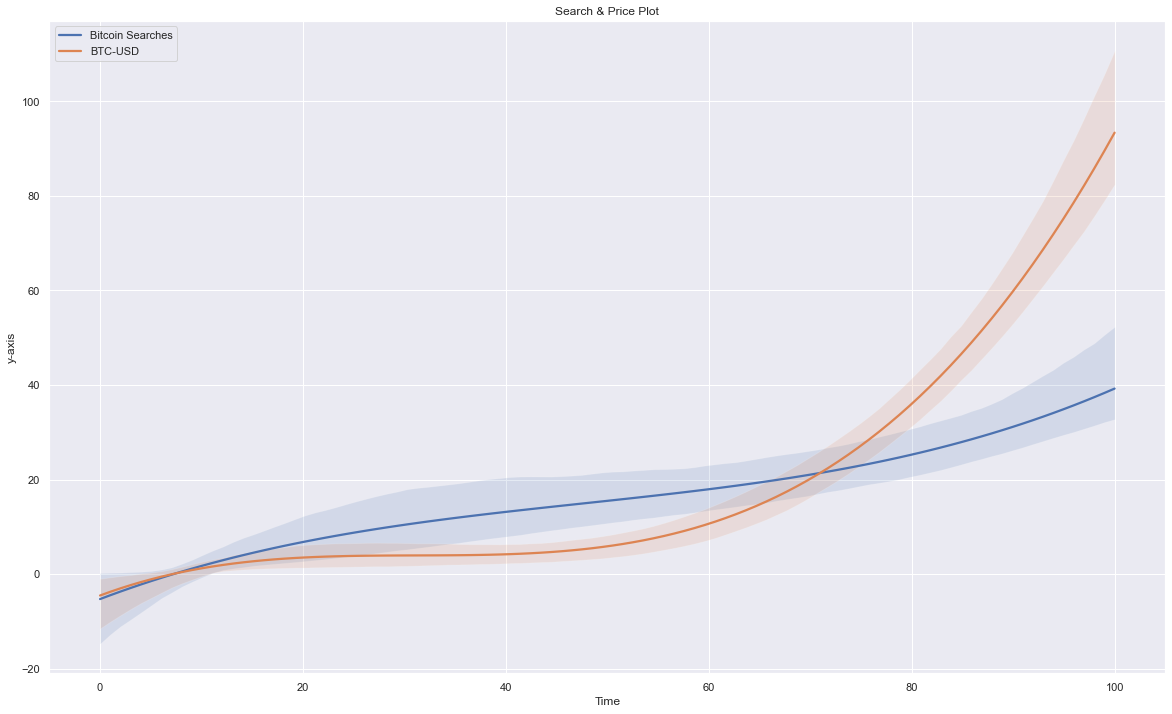

In [51]:
plt.subplots(figsize= (20,12))

sns.set_theme(color_codes=True)

sns.regplot(x='Time',
            y='Bitcoin Searches',
            data=search_and_price_scale,
            label='Bitcoin Searches',
            scatter=False,
            # ci=True,
            order=3)    

sns.regplot(x='Time',
            y='BTC-USD',
            data=search_and_price_scale,
            label='BTC-USD',
            scatter=False,
            # ci=True,
            order=3)    

# sns.lineplot(x='Time',
#             y='Bitcoin Searches',
#             data=search_and_price_scale,
#             label='Bitcoin Searches')

# sns.lineplot(x='Time',
#             y='Ethereum Searches',
#             data=search_and_price_scale,
#             label='Ethereum Searches',
#             linestyle="dashed")    

# sns.lineplot(x='Time', 
#             y='BTC-USD', 
#             data=search_and_price_scale,
#             label='BTC-USD',
#             linestyle="dashed")
#             # scatter=False,)    

# sns.lineplot(x='Time',
#             y='ETH-USD',
#             data=search_and_price_scale,
#             label='ETH-USD')

# sns.regplot(x='Time', 
#             y='BTC-USD', 
#             data=search_and_price_scale,
#             label='BTC-USD',
#             scatter=False,
#             order=3)    

# sns.regplot(x='Time',
#             y='ETH-USD',
#             data=search_and_price_scale,
#             label='ETH-USD',
#             scatter=False,
#             order=3)    


plt.title("Search & Price Plot")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')

# Save plot
# plt.savefig("plots\\search_and_price_plot.jpg", dpi = 300)
plt.show()

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(search_and_price_concat['Bitcoin'], label="BTC-UDS")
line2, = ax.plot(search_and_price_concat['Ethereum'], label="ETH-USD")
line3, = ax.plot(search_and_price_concat['Binance Coin'], label="BNB-USD")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2,line3], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Time")
plt.ylabel("y-axis")

# Add a title to the plot
plt.title("Bitcoin Price & Search Data")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)
plt.savefig("search_and_price\\search_and_price_data_unsacled.jpg", dpi = 300)

# Show the plot
plt.show()


### Visualize Price and Search data (Scaled)

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(search_and_price_scale['Ethereum'], label="Ethereum Searches")
line2, = ax.plot(search_and_price_scale[('Close','BTC-USD')], label="BTC-USD")
# line3, = ax.plot(search_and_price_scale[('Close','BNB-USD')], label="BNB-USD")
# line4, = ax.plot(search_and_price_scale[('Close','ETH-USD')], label="ETH-USD")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Time")
plt.ylabel("y-axis")

# Add a title to the plot
plt.title("Bitcoin Price & Search Data")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)
plt.savefig("search_and_price\\search_and_price_data_scaled.jpg", dpi = 300)

# Show the plot
plt.show()

# Regression Plots

In [ ]:
plt.subplots(figsize= (20,12))
plt.title("Dogecoin Search and Price correlation")
sns.set_theme(color_codes=True)
sns.regplot(x='Time', y='Open', data=test_scaled)    
sns.regplot(x='Time', y='Dogecoin', data=test_scaled)    
# plt.legend(labels=["Open","Dogecoin"])
# sns.lmplot(x="height", y=i, data=test, x_jitter=.05)
# plt.savefig(f"block_and_search\\weight_reg.jpg", dpi = 300)

<AxesSubplot:xlabel='Length', ylabel='Ethereum'>

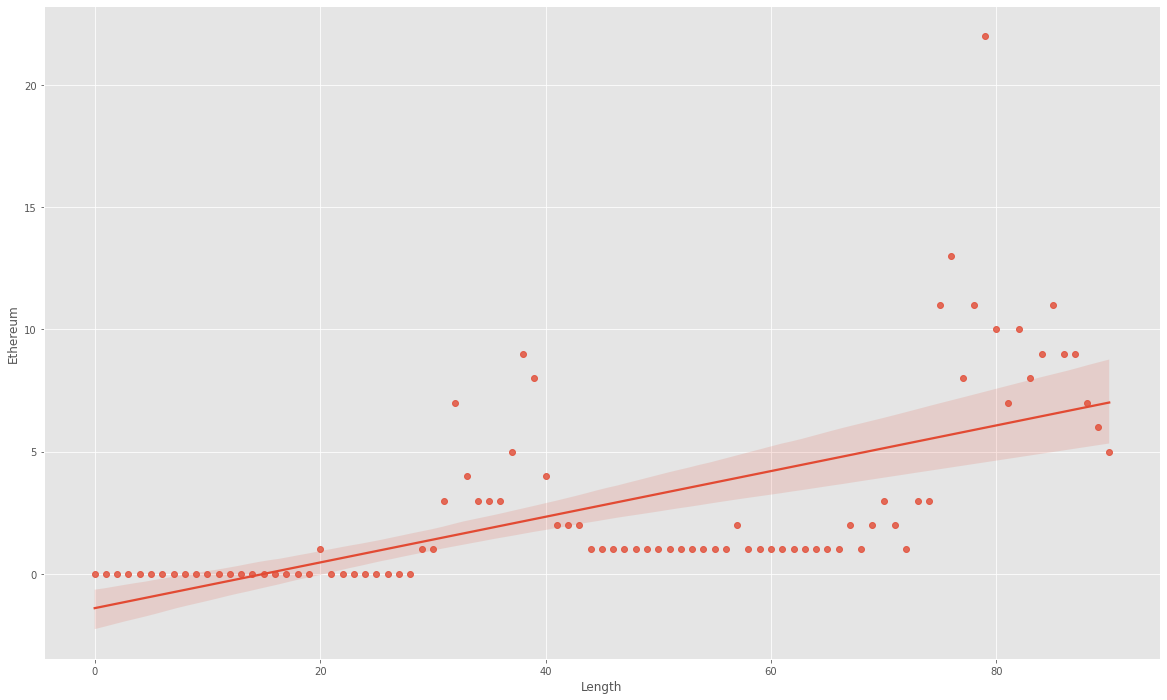

In [89]:
# Generate data
# x = rng.uniform(0, 10, size=100)
# y = x + rng.normal(size=100)

# Initialize layout
fig, ax = plt.subplots(figsize = (20, 12))
plt.subplots(figsize= (20,12))

x = search_and_price_concat['Length']
y = search_and_price_concat['Ethereum']

ax = sns.regplot(x="Length", y="Ethereum", data=search_and_price_concat)
ax = sns.regplot(x="Length", y="Ethereum", data=search_and_price_concat)



# OTHER

In [ ]:
# Plot BTC Volume
btc['Volume'].plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")
# Save the plot to present directory
plt.savefig("plots\\btc_volume.png")

In [ ]:
# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)
# set the keyword & timeframe
keywords = ["Coinbase", "Binance"]
pt.build_payload(keywords, timeframe="all")
# get the interest over time
exch_iot = pt.interest_over_time()
# Save iot as a .csv file in the current directory
exch_iot.to_csv("data\\exch_iot.csv")
exch_iot

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(exch_iot['Coinbase'].truncate(before=list(exch_iot.index)[145]), label="Coinbase")
line2, = ax.plot(exch_iot['Binance'].truncate(before=list(exch_iot.index)[145]), label="Binance")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Relative Interest")

# Add a title to the plot
plt.title("Crypto Exchange Interest Over Time")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)
plt.savefig("plots\\exch_iot.jpg", dpi = 300)

# Show the plot
plt.show()


In [ ]:
# Plot BTC Volume
btc['High'].plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")
# Save the plot to present directory
plt.savefig("plots\\btc_volume.png")

In [ ]:
# the keyword to extract data
keyword = ["Bitcoin"]
pt.build_payload(keyword, timeframe="all")
# get the interest by country
ibr = pt.interest_by_region("COUNTRY", inc_low_vol=True, inc_geo_code=True)
# Convert the series ibr to pandas dataframe
ibr = pd.DataFrame(ibr)
# Sort the dataframe by the value of the column "Bitcoin"
ibr.sort_values("Bitcoin", inplace=True, ascending=False)
# Save the dataframe to a csv file
ibr.to_csv("data\\ibr.csv")
ibr